Universidad del Valle de Guatemala

Data Science

Fernanda Esquivel 21542

Sofi Lam 21548

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

## **Exploración de los datos**

In [3]:
consumo = pd.read_csv('CONSUMO-2024-05.csv')
importacion=pd.read_csv('IMPORTACION-VOLUMEN-2024-05.csv')
PreciosPromedio=pd.read_csv('PreciosPromedioNacionales.csv')

**Consumo de combustibles**

In [4]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
consumo.dtypes

,0
Fecha,object
Aceites lubricantes,object
Asfalto,object
Bunker,object
Ceras,float64
Combustible turbo jet,object
Diesel bajo azufre,object
Diesel ultra bajo azufre,object
Gas licuado de petróleo,object
Gasolina de aviación,object


Como vemos anteriormente, tenemos columnas que no tienen nombre debido a que se encuentran vacías, estas columnas extra pueden ser debido a que al descargar el conjunto de datos sólo da la opción de descargarlo en formato excel, la conversión a .csv pudo haber agregado estas columnas extra. Por lo que se procede a eliminar estas columnas, para tener el data frame original.

In [6]:
columnas_a_eliminar=[f'Unnamed: {i}' for i in range(23,53)]
consumo = consumo.drop(columns= columnas_a_eliminar)

In [7]:
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.00,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.00,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.00,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.00,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.00,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


Vemos que los datos que nos interesan son de tipo "object" en lugar de float, por lo que convertimos estos valores en float, para esto también debemos quitar las comas en las columnas.

In [8]:
consumo["Gasolina superior"] = consumo["Gasolina superior"].astype(str)
consumo["Gasolina superior"] = consumo["Gasolina superior"].apply(lambda x: x.replace(',', '')).astype(float)
consumo["Gasolina regular"] = consumo["Gasolina regular"].astype(str)
consumo["Gasolina regular"] = consumo["Gasolina regular"].apply(lambda x: x.replace(',', '')).astype(float)
consumo["Diesel bajo azufre"] = consumo["Diesel bajo azufre"].astype(str)
consumo["Diesel bajo azufre"] = consumo["Diesel bajo azufre"].apply(lambda x: x.replace(',', '')).astype(float)
consumo.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Kerosina,Mezclas\noleosas,Naftas,PetCoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,Orimulsión,Total
0,Jan/2000,0.00,"48,446.00","296,766.99",0.0,0.00,0.0,0.00,"194,410.48","1,426.00",...,"64,026.09",0.00,0.0,0.00,0.00,0.00,0.0,"634,667.06",0.00,"1,750,544.64"
1,Feb/2000,0.00,"50,597.00","328,116.44",0.0,0.00,0.0,0.00,"174,710.55","1,458.00",...,"62,660.30",0.00,0.0,0.00,0.00,0.00,0.0,"642,380.66",0.00,"1,773,220.22"
2,Mar/2000,0.00,"27,593.00","368,589.63",0.0,0.00,0.0,0.00,"189,234.07","1,503.00",...,"61,361.99",0.00,0.0,0.00,0.00,0.00,0.0,"699,807.25",0.00,"1,909,498.79"
3,Apr/2000,0.00,"53,794.00","396,300.47",0.0,0.00,0.0,0.00,"174,330.61","1,561.00",...,"61,814.32",0.00,0.0,0.00,0.00,0.00,0.0,"586,803.98",0.00,"1,800,932.86"
4,May/2000,0.00,"60,137.00","449,368.92",0.0,0.00,0.0,0.00,"191,745.15","1,642.00",...,"54,098.32",0.00,0.0,0.00,0.00,0.00,0.0,"656,948.20",0.00,"1,941,771.90"


Pasamos la columna de fecha al formato de fecha para podeer realizar las series de tiempo correspondientes.

In [9]:
consumo['Fecha'] = pd.to_datetime(consumo['Fecha'], format='%b/%Y')

In [10]:
consumo.set_index('Fecha', inplace=True)

**Importación de Combustibles**


In [11]:
importacion.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,Jan-01,0,"27,748.99","214,581.84",0.0,0,0,0,"194,065.74",820,...,0.0,0,0,0,0.0,"566,101.99","8,402.00",0,"715,344.00","2,312,639.05"
1,Feb-01,0,"7,503.57","294,609.00",0.0,0,0,0,"170,703.38","3,054.00",...,0.0,0,0,0,0.0,"489,525.80",0,0,"370,166.00","1,769,208.76"
2,Mar-01,0,"26,304.32","315,263.80",0.0,0,0,0,"161,837.37",677,...,0.0,0,0,0,0.0,"575,559.68",0,0,"360,530.00","1,945,770.26"
3,Apr-01,0,"7,885.89","205,653.00",0.0,0,0,0,"163,048.64","3,399.00",...,0.0,0,0,0,0.0,"437,745.42","8,184.00",0,"359,527.00","1,623,637.76"
4,May-01,0,"8,443.16","278,371.30",0.0,0,0,0,"171,518.86",585,...,0.0,0,0,0,0.0,"552,609.13","12,680.00",0,"723,346.00","2,262,726.64"


In [12]:
importacion.dtypes

,0
Fecha,object
Aceites lubricantes,object
Asfalto,object
Bunker,object
Ceras,float64
Combustible turbo jet,object
Diesel bajo azufre,object
Diesel ultra bajo azufre,object
Gas licuado de petróleo,object
Gasolina de aviación,object


Al igual que en el data frame del Consumo de combustible, las variables que nos interesan en este conjunto de datos son de tipo "object" por lo que los reescribimos como floats al eliminar las comas en los datos de interés

In [13]:
importacion["Gasolina superior"] = importacion["Gasolina superior"].astype(str)
importacion["Gasolina superior"] = importacion["Gasolina superior"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Gasolina regular"] = importacion["Gasolina regular"].astype(str)
importacion["Gasolina regular"] = importacion["Gasolina regular"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Diesel bajo azufre"] = importacion["Diesel bajo azufre"].astype(str)
importacion["Diesel bajo azufre"] = importacion["Diesel bajo azufre"].apply(lambda x: x.replace(',', '')).astype(float)
importacion["Gas licuado de petróleo"] = importacion["Gas licuado de petróleo"].astype(str)
importacion["Gas licuado de petróleo"] = importacion["Gas licuado de petróleo"].apply(lambda x: x.replace(',', '')).astype(float)
importacion.head()

,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,Jan-01,0,"27,748.99","214,581.84",0.0,0,0.0,0,194065.74,820,...,0.0,0,0,0,0.0,"566,101.99","8,402.00",0,"715,344.00","2,312,639.05"
1,Feb-01,0,"7,503.57","294,609.00",0.0,0,0.0,0,170703.38,"3,054.00",...,0.0,0,0,0,0.0,"489,525.80",0,0,"370,166.00","1,769,208.76"
2,Mar-01,0,"26,304.32","315,263.80",0.0,0,0.0,0,161837.37,677,...,0.0,0,0,0,0.0,"575,559.68",0,0,"360,530.00","1,945,770.26"
3,Apr-01,0,"7,885.89","205,653.00",0.0,0,0.0,0,163048.64,"3,399.00",...,0.0,0,0,0,0.0,"437,745.42","8,184.00",0,"359,527.00","1,623,637.76"
4,May-01,0,"8,443.16","278,371.30",0.0,0,0.0,0,171518.86,585,...,0.0,0,0,0,0.0,"552,609.13","12,680.00",0,"723,346.00","2,262,726.64"


Reescribimos la fecha en formato de fecha para poder realizar la serie de tiempo

In [14]:
importacion['Fecha'] = pd.to_datetime(importacion['Fecha'], format='%b-%y', errors='coerce')
importacion.set_index('Fecha', inplace=True)

**Precios Promedios a consumidor final en Ciudad Capital**

In [15]:
PreciosPromedio.head()

,FECHA,Tipo de cambio,Superior,Regular,Diesel,Bunker,Glp Cilindro 25Lbs.,Unnamed: 7
0,01/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
1,02/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
2,03/Jan/2021,7.79382,21.91,21.11,17.61,13.40,99.0,3.96
3,04/Jan/2021,7.79417,21.91,21.11,17.61,13.45,99.0,3.96
4,05/Jan/2021,7.79369,21.91,21.11,17.61,13.45,99.0,3.96


In [16]:
PreciosPromedio.dtypes

,0
FECHA,object
Tipo de cambio,float64
Superior,float64
Regular,float64
Diesel,float64
Bunker,float64
Glp Cilindro 25Lbs.,float64
Unnamed: 7,float64


A diferencia de los conjuntos de datos anteriores, este conjunto de datos ya tiene las variables que nos interesan como floats, por lo que no es necesario cambiarlos. Sin embargo, si cambiamos el formato de la variable Fecha a formato fecha.

In [17]:
PreciosPromedio['FECHA'] = pd.to_datetime(PreciosPromedio['FECHA'], format='%d/%b/%Y', errors='coerce')
PreciosPromedio.set_index('FECHA', inplace=True)

# SERIES DE TIEMPO

**Consumo de combustible**

In [20]:
consumo_superior_resampled = consumo['Gasolina superior'].resample('M').mean()
consumo_regular_resampled = consumo['Gasolina regular'].resample('M').mean()
consumo_diesel_resampled = consumo['Diesel bajo azufre'].resample('M').mean()

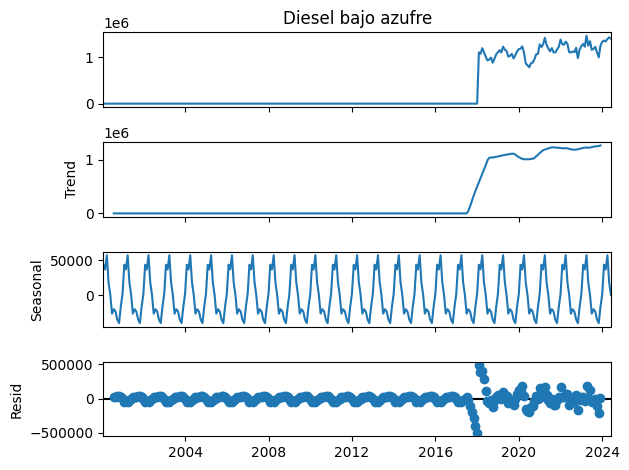

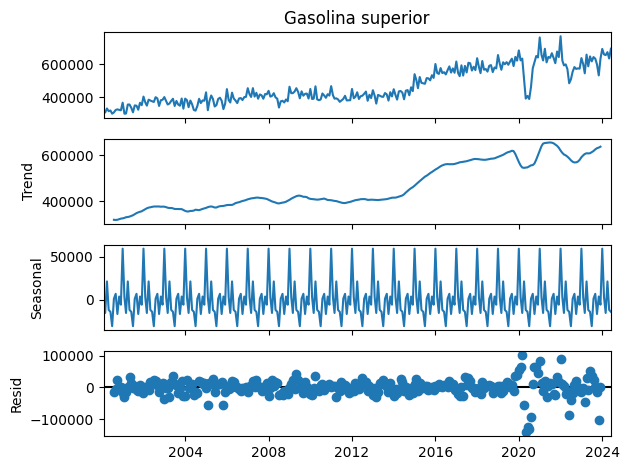

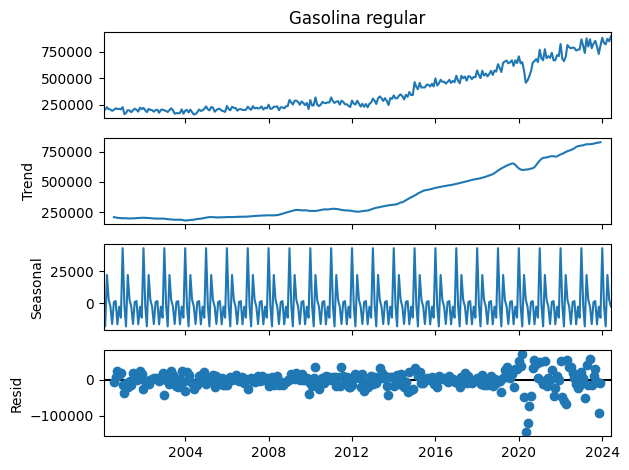

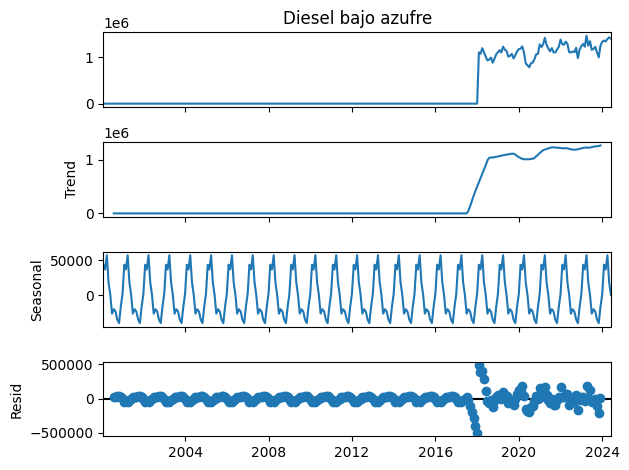

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado_superiorC = seasonal_decompose(consumo_superior_resampled.dropna())
resultado_superiorC.plot()

resultado_regularC = seasonal_decompose(consumo_regular_resampled.dropna())
resultado_regularC.plot()

resultado_dieselC = seasonal_decompose(consumo_diesel_resampled.dropna())
resultado_dieselC.plot()

**Importacion**

In [21]:
importacion_superior_resampled = importacion['Gasolina superior'].resample('M').mean()
importacion_regular_resampled = importacion['Gasolina regular'].resample('M').mean()
importacion_diesel_resampled = importacion['Diesel bajo azufre'].resample('M').mean()

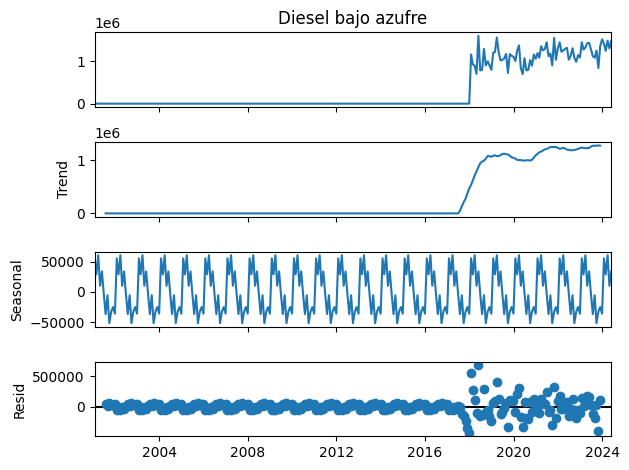

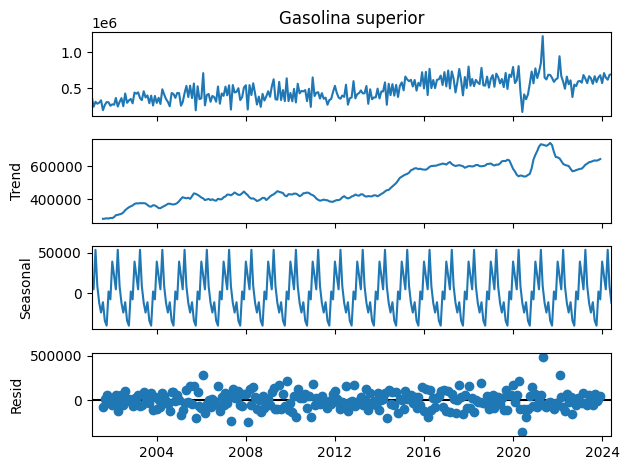

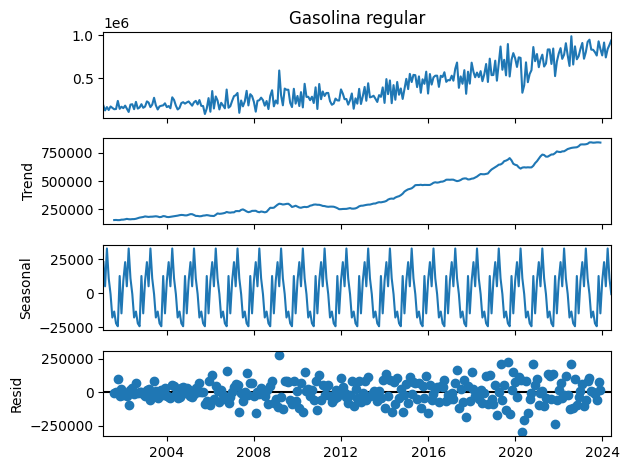

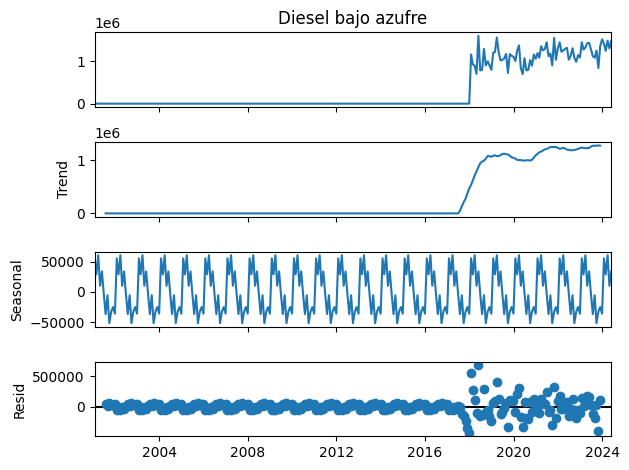

In [22]:
resultado_superiorI = seasonal_decompose(importacion_superior_resampled.dropna())
resultado_superiorI.plot()

resultado_regularI = seasonal_decompose(importacion_regular_resampled.dropna())
resultado_regularI.plot()

resultado_dieselI = seasonal_decompose(importacion_diesel_resampled.dropna())
resultado_dieselI.plot()

**Precios Promedios**

In [23]:
precio_superior_resampled = PreciosPromedio['Superior'].resample('M').mean()
precio_regular_resampled = PreciosPromedio['Regular'].resample('M').mean()
precio_diesel_resampled = PreciosPromedio['Diesel'].resample('M').mean()

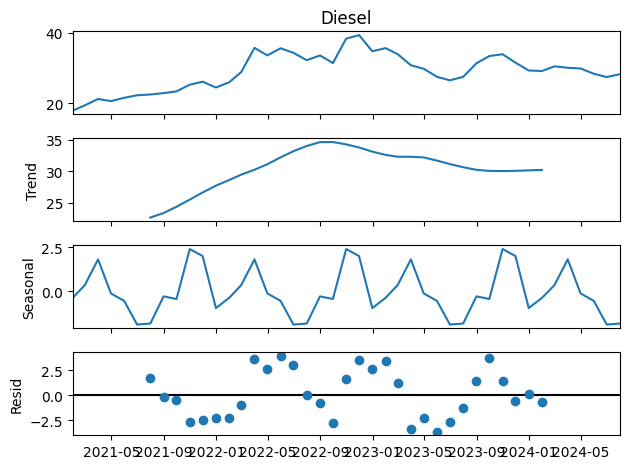

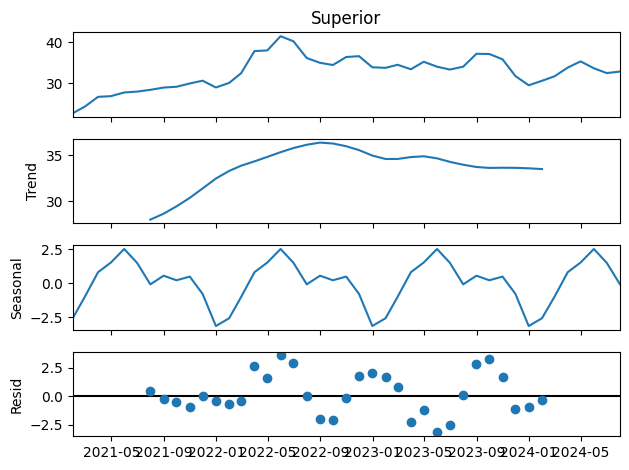

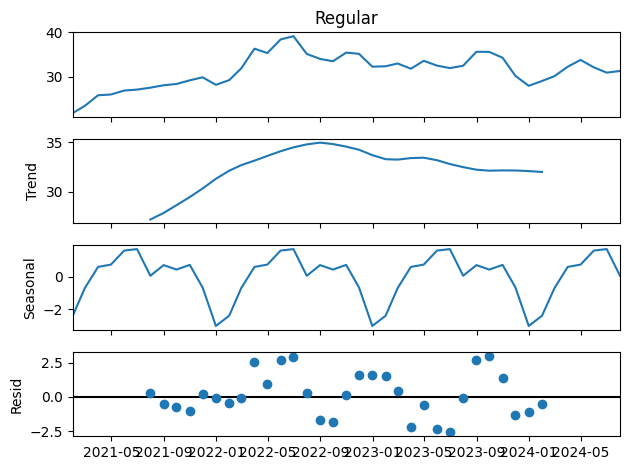

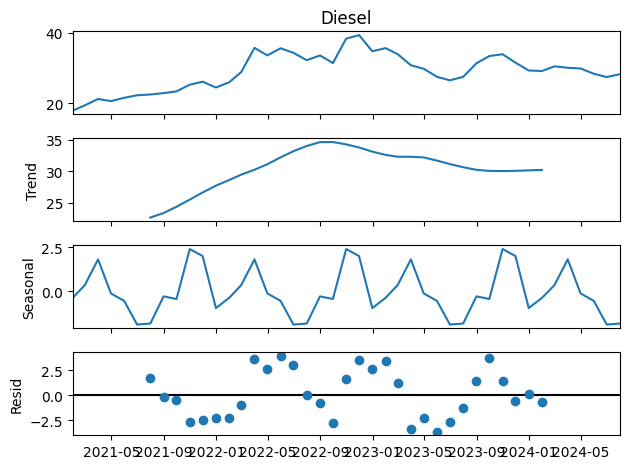

In [24]:
resultado_superiorP = seasonal_decompose(precio_superior_resampled.dropna())
resultado_superiorP.plot()

resultado_regularP = seasonal_decompose(precio_regular_resampled.dropna())
resultado_regularP.plot()

resultado_dieselP = seasonal_decompose(precio_diesel_resampled.dropna())
resultado_dieselP.plot()